In [9]:
from nilearn import datasets
from nilearn.regions import Parcellations
from nilearn import plotting
from nilearn.image import mean_img, index_img
import time
import numpy as np
from nilearn.image import get_data

In [3]:
dataset = datasets.fetch_development_fmri(n_subjects=1)

In [7]:
start = time.time()
ward = Parcellations(method='ward', n_parcels=1000,
                     standardize=False, smoothing_fwhm=2.,
                     memory='nilearn_cache', memory_level=1,
                     verbose=1)
# Call fit on functional dataset: single subject (less samples).
ward.fit(dataset.func)
print("Ward agglomeration 1000 clusters: %.2fs" % (time.time() - start))

# We compute now ward clustering with 2000 clusters and compare
# time with 1000 clusters. To see the benefits of caching for second time.

# We initialize class again with n_parcels=2000 this time.
ward = Parcellations(method='ward', n_parcels=2000,
                     standardize=False, smoothing_fwhm=2.,
                     memory='nilearn_cache', memory_level=1,
                     verbose=1)
ward.fit(dataset.func)
print("Ward agglomeration 2000 clusters: %.2fs" % (time.time() - start))

[MultiNiftiMasker.fit] Loading data from [C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[Parcellations] computing ward
Ward agglomeration 1000 clusters: 3.55s
[MultiNiftiMasker.fit] Loading data from [C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[Parcellations] computing ward
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[0.000639, ..., 0.006264],
       ...,
       [0.000277, ..., 0.011854]]), AgglomerativeClustering(connectivity=<24256x24256 sparse ma

D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


Ward agglomeration 2000 clusters: 11.66s


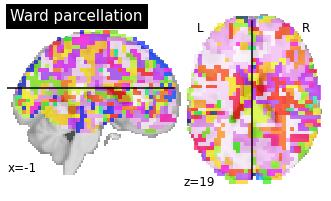

In [8]:
ward_labels_img = ward.labels_img_

# Now, ward_labels_img are Nifti1Image object, it can be saved to file
# with the following code:
ward_labels_img.to_filename('ward_parcellation.nii.gz')
first_plot = plotting.plot_roi(ward_labels_img, title="Ward parcellation",
                               display_mode='xz')

# Grab cut coordinates from this plot to use as a common for all plots
cut_coords = first_plot.cut_coords

[Parcellations.transform] loading data from Nifti1Image('ward_parcellation.nii.gz')
[Parcellations.transform] loading data from Nifti1Image(
shape=(50, 59, 50),
affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]])
)
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x0000024BBE4368B0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x0000024BBE3B4220>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x0000024BBE436AC0>,
  'low_pass': None,
  'mask_img': <nibabel.nifti1.Nifti1Image object at 0x0000024BBE436B20>,
  'reports': True,
  'smoothing_fwhm': 2.0,
  'standardi

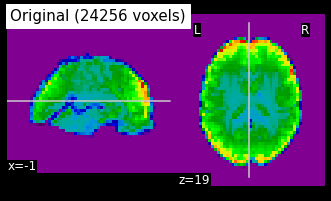

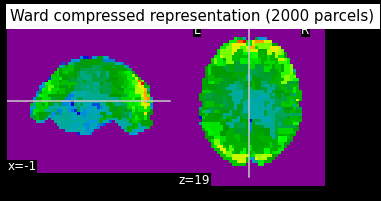

In [10]:
original_voxels = np.sum(get_data(ward.mask_img_))

# Compute mean over time on the functional image to use the mean
# image for compressed representation comparisons
mean_func_img = mean_img(dataset.func[0])

# Compute common vmin and vmax
vmin = np.min(get_data(mean_func_img))
vmax = np.max(get_data(mean_func_img))

plotting.plot_epi(mean_func_img, cut_coords=cut_coords,
                  title='Original (%i voxels)' % original_voxels,
                  vmax=vmax, vmin=vmin, display_mode='xz')

# A reduced dataset can be created by taking the parcel-level average:
# Note that Parcellation objects with any method have the opportunity to
# use a `transform` call that modifies input features. Here it reduces their
# dimension. Note that we `fit` before calling a `transform` so that average
# signals can be created on the brain parcellations with fit call.
fmri_reduced = ward.transform(dataset.func)

# Display the corresponding data compressed using the parcellation using
# parcels=2000.
fmri_compressed = ward.inverse_transform(fmri_reduced)

plotting.plot_epi(index_img(fmri_compressed, 0),
                  cut_coords=cut_coords,
                  title='Ward compressed representation (2000 parcels)',
                  vmin=vmin, vmax=vmax, display_mode='xz')
# As you can see below, this approximation is almost good, although there
# are only 2000 parcels, instead of the original 60000 voxels

In [12]:
# class/functions can be used here as they are already imported above.

# This object uses method='kmeans' for KMeans clustering with 10mm smoothing
# and standardization ON
start = time.time()
kmeans = Parcellations(method='kmeans', n_parcels=50,
                       standardize=True, smoothing_fwhm=10.,
                       memory='nilearn_cache', memory_level=1,
                       verbose=1)
# Call fit on functional dataset: single subject (less samples)
kmeans.fit(dataset.func)

[MultiNiftiMasker.fit] Loading data from [C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data


D:\anaconda\envs\mne\lib\site-packages\nilearn\_utils\cache_mixin.py:303: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[Parcellations] computing kmeans
________________________________________________________________________________
[Memory] Calling nilearn.regions.parcellations._estimator_fit...
_estimator_fit(array([[ 0.009162, ...,  0.006794],
       ...,
       [-0.006099, ...,  0.001681]]), 
MiniBatchKMeans(n_clusters=50, random_state=0))
____________________________________________________estimator_fit - 0.9s, 0.0min


D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


Parcellations(memory=Memory(location=nilearn_cache\joblib), memory_level=1,
              method='kmeans', smoothing_fwhm=10.0, standardize=True)

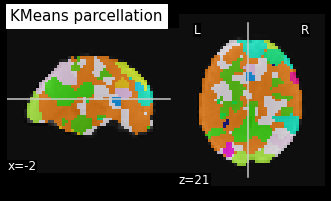

In [13]:
kmeans_labels_img = kmeans.labels_img_

plotting.plot_roi(kmeans_labels_img, mean_func_img,
                  title="KMeans parcellation",
                  display_mode='xz')


In [14]:
start = time.time()
rena = Parcellations(method='rena', n_parcels=5000, standardize=False,
                     smoothing_fwhm=2., scaling=True)

rena.fit_transform(dataset.func)
print("ReNA 5000 clusters: %.2fs" % (time.time() - start))

[MultiNiftiMasker.fit] Loading data from [C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[Parcellations] computing rena


D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


[Parcellations.fit_transform] loading data from Nifti1Image(
shape=(50, 59, 50),
affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]])
)
[Parcellations.fit_transform] loading data from Nifti1Image(
shape=(50, 59, 50),
affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]])
)
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[NiftiLabelsMasker.transform_single_imgs] Smoothing images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
ReNA 5000 clusters: 8.32s


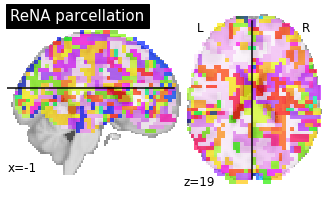

In [15]:
rena_labels_img = rena.labels_img_

# Now, rena_labels_img are Nifti1Image object, it can be saved to file
# with the following code:
rena_labels_img.to_filename('rena_parcellation.nii.gz')

plotting.plot_roi(ward_labels_img, title="ReNA parcellation",
                  display_mode='xz', cut_coords=cut_coords)

[Parcellations.transform] loading data from Nifti1Image('rena_parcellation.nii.gz')
[Parcellations.transform] loading data from Nifti1Image(
shape=(50, 59, 50),
affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]])
)
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[NiftiLabelsMasker.transform_single_imgs] Smoothing images
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


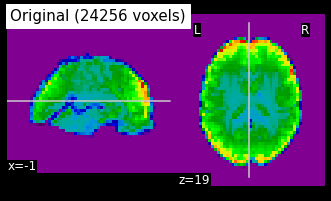

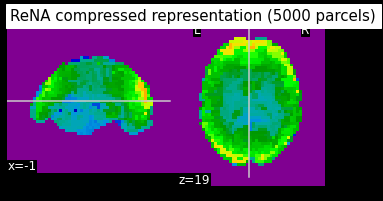

In [16]:
# Display the original data
plotting.plot_epi(mean_func_img, cut_coords=cut_coords,
                  title='Original (%i voxels)' % original_voxels,
                  vmax=vmax, vmin=vmin, display_mode='xz')

# A reduced data can be created by taking the parcel-level average:
# Note that, as many scikit-learn objects, the ReNA object exposes
# a transform method that modifies input features. Here it reduces their
# dimension.
# However, the data are in one single large 4D image, we need to use
# index_img to do the split easily:
fmri_reduced_rena = rena.transform(dataset.func)

# Display the corresponding data compression using the parcellation
compressed_img_rena = rena.inverse_transform(fmri_reduced_rena)

plotting.plot_epi(index_img(compressed_img_rena, 0), cut_coords=cut_coords,
                  title='ReNA compressed representation (5000 parcels)',
                  vmin=vmin, vmax=vmax, display_mode='xz')